In [1]:
%matplotlib inline
import json
import matplotlib
from matplotlib import pyplot as plt
import glob
import numpy as np
import torch
from feng.aae import AAEdecoder
ALPHABET = np.array(list("ACDEFGHIKLMNPQRSTVWYX"))
to_seq = lambda x: "".join(ALPHABET[x.view((len(ALPHABET), 11)).argmax(dim=0)]).replace("X", " ")

In [7]:
# import sys
# !conda install --yes --prefix {sys.prefix} matplotlib

In [21]:
def load(filestring, wide=False):
    files = glob.glob(filestring)
    data = {}
    for file in files:
        with open(file) as f:
            key_comm = file[file.find("aae")+3:]
            key_lin = file[file.find("lin"):file.find("aae")-1]
            key = key_lin + key_comm
            print(key)
            data[key] = json.load(f)

    N_COL=3
    if wide:
        N_COL=7

    keys = ["recon", "reg", "gen"]
    if wide:
        keys = ["recon", "reg", "gen", "reg_c", "gen_c", "ent", "f1"]
    
    phases = ["train", "val"]
    if len(data[list(data.keys())[0]]['scores']) == 3:
        phases = ["train", "nolabel", "val"]
        
    fig, ax = plt.subplots(len(phases), N_COL)

    fig.set_figwidth(24)
    fig.set_figheight(8)

    for j, phase in enumerate(phases):
        for i, key in enumerate(keys):
            for f in sorted(data):
                try:
                    ax[j][i].plot(data[f]['scores'][phase][key], label=f)
                    ax[j][i].set_title(key)
                except KeyError:
                    pass

    ax[0][0].legend()
    ax[0][0].set_ylabel("train")
    ax[1][0].set_ylabel("val")

lin256-256_lat10_adam_lr0001_b32_softgen.txt
lin256-256_lat40_adam_lr0001_b32_genlr5_softgen.txt


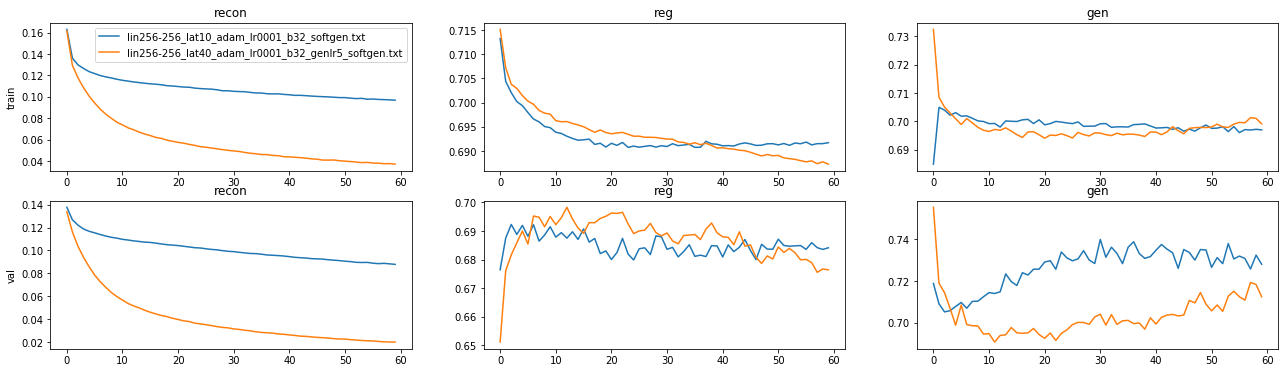

In [280]:
load("wei*256*aae*lr0001*")

lin128-128-128-128_lat40_adam_lr001_b64_softgen_lab2.txt
lin256-256-256_lat40_adam_lr001_b64_softgen_lab2.txt
lin256-256_lat40_adam_lr001_b64_softgen_lab2.txt
lin256-256_lat40_adam_lr001_b64_softgen_v3.txt
lin256-256_lat40_rmsprop_lr001_b64_softgen_v2.txt


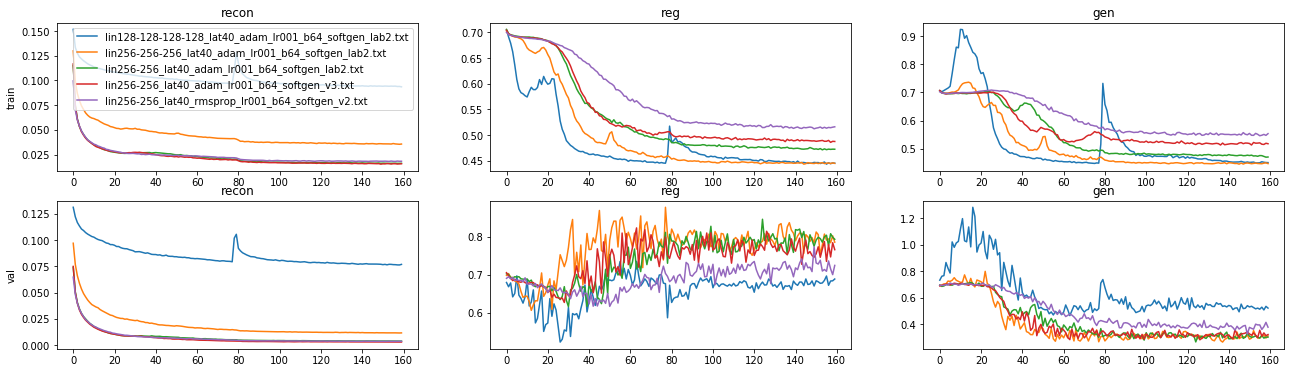

In [373]:
load("wei*e80*aae*b64*")

lin256-256-256_lr001.txt
lin256-256-256_lr00001_lat20.txt
lin256-256-256_lr001_v2.txt
lin256-256-256_lr00001_v2.txt
lin256-256-256_lr00001.txt
lin256-256-256_lr00001_d_cat_small.txt
lin256-256-256_lr00001_d_cat_big.txt
lin256-256-256_lr001.txt
lin256-256-256_lr00001.txt
lin256-256-256.txt
lin256-256-256_lr0001_d_cat_big.txt
lin256-256-256_lr0001_lat80.txt
lin256-256-256_lr001_lat80.txt
lin256-256-256_lr0001.txt


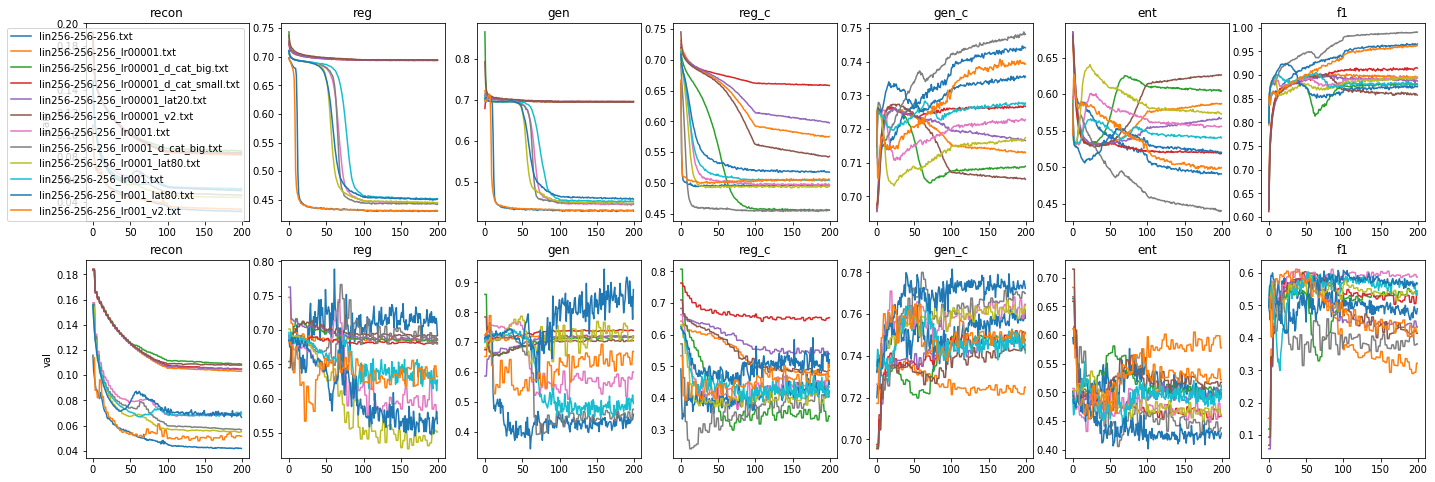

In [22]:
load("results_clf/wei*", 1)

lin256-256-256_lr00001_lat20.txt
lin256-256-256_lr00001_v2.txt
lin256-256-256_lr00001.txt
lin256-256-256_lr00001_d_cat_small.txt
lin256-256-256_lr00001_d_cat_big.txt
lin256-256-256_lr00001.txt


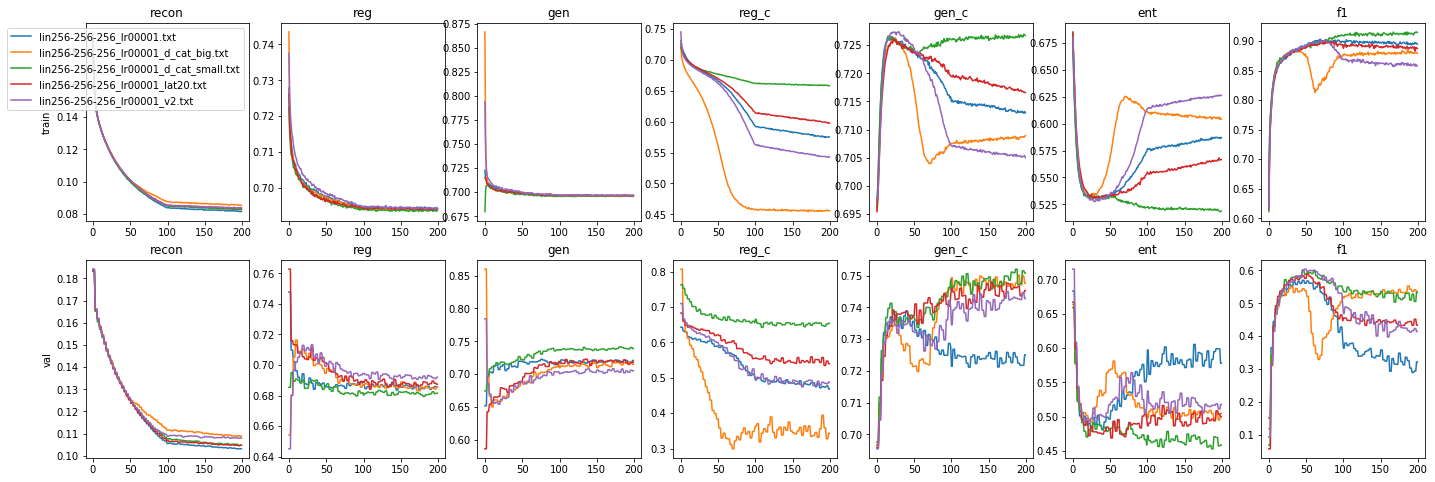

In [27]:
load("results_clf/wei*lr00001*", 1)

lin256-256-256_dcat_big_lr0001_b32.txt
lin256-256-256_dcat_big_lr00001.txt
lin256-256-256_dcat_big_lr00001_v2.txt
lin256-256-256_dcat_big_lr00001_b32.txt
lin256-256-256_dcat_big_lrDiv4_lr00003.txt
lin256-256-256_dcat_big_lr0001.txt
lin256-256-256_dcat_big_lrDiv4_lr00003_v2.txt
lin256-256-256_dcat_big_lr0001_v2.txt


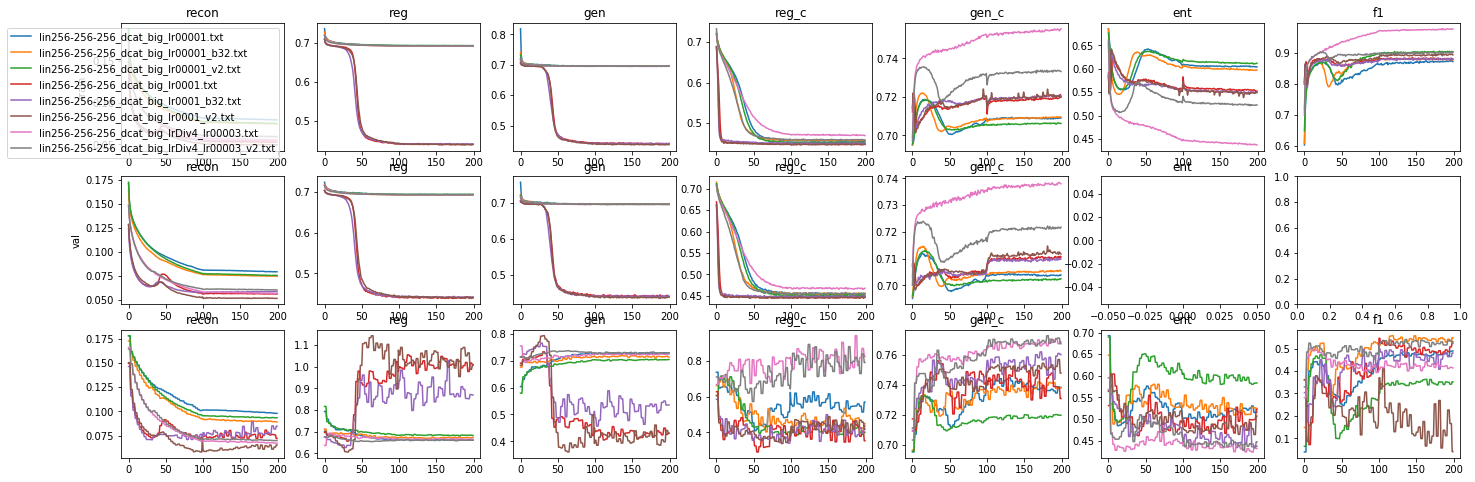

In [28]:
load("results_nolabel/wei*", 1)

lin256-256-256_dcat_big_lr00001.txt
lin256-256-256_dcat_big_lr00001_v2.txt
lin256-256-256_dcat_big_lr00001_b32.txt


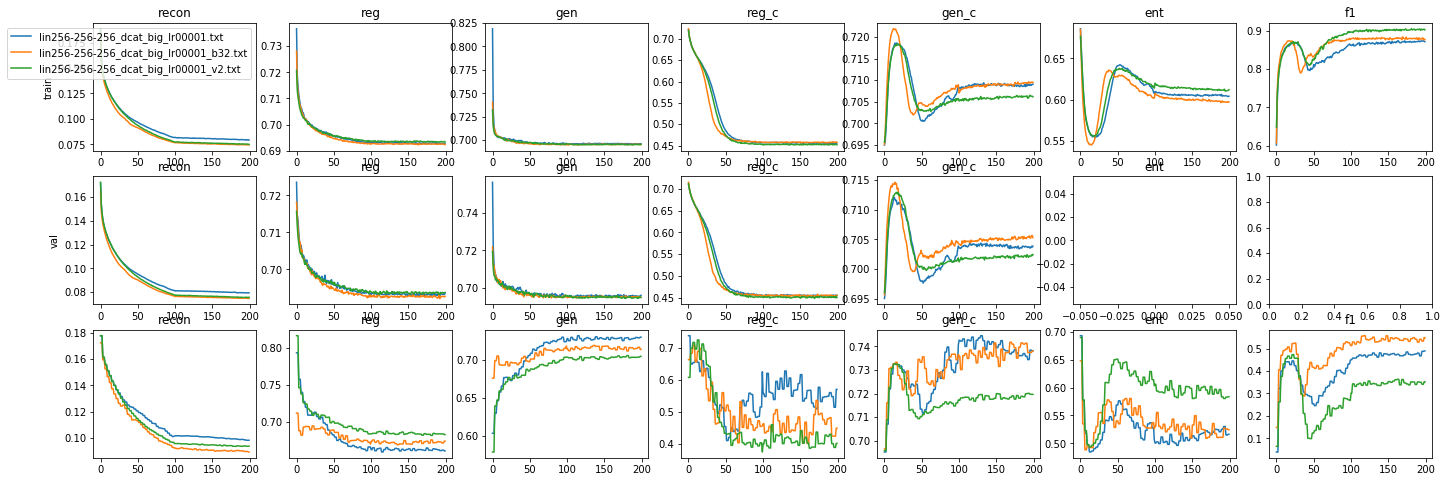

In [29]:
load("results_nolabel/wei*dcat_big_lr00001*", 1)

lin256-256-256_dcat_big_lrDiv4_lr00003.txt
lin256-256-256_dcat_big_lrDiv4_lr00003_v2.txt


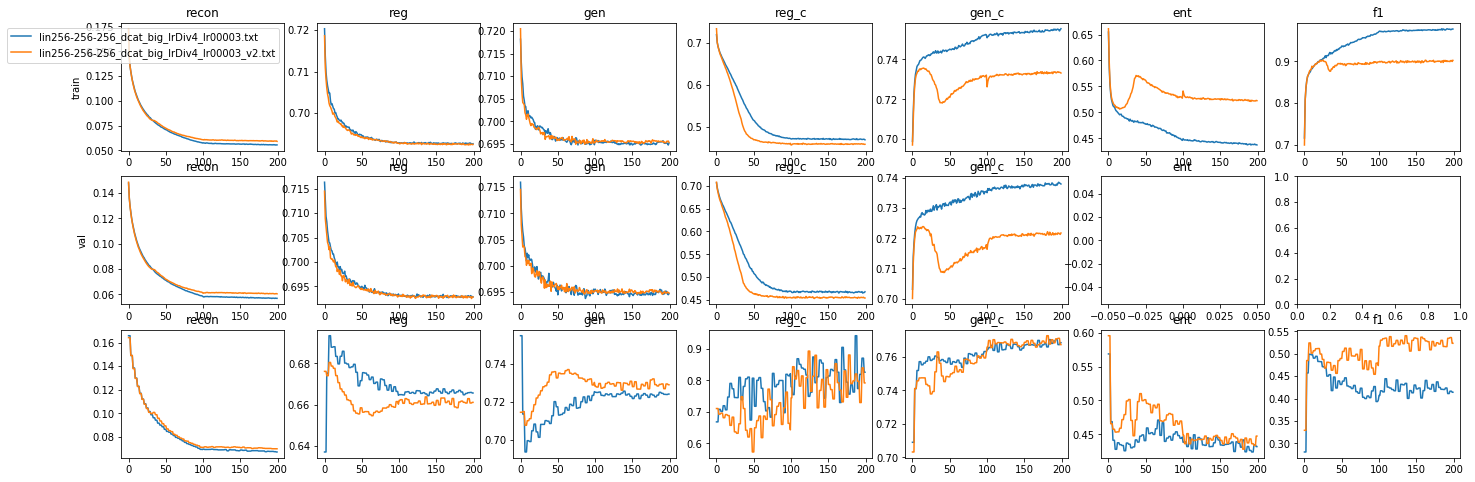

In [30]:
load("results_nolabel/wei*lrDiv4_lr00003*", 1)

In [415]:
MODEL_FILE = "model_P_wei_onehot_x_nosyn_e80_b64_lat40_lin256-256-256_aae_lat40_adam_lr001_b64_softgen_lab2.pt"
model = AAEdecoder(42, 11, 21, [256, 256, 256], dropout=0.2)
model.load_state_dict(torch.load(MODEL_FILE))

In [345]:
HALF_BATCH_SIZE = 10
model.eval()
# z_lat = torch.tensor(torch.randn(HALF_BATCH_SIZE, 30))
z_lat = torch.zeros(HALF_BATCH_SIZE, 40).normal_(0, 5)
z_lat = torch.cat([z_lat, z_lat], 0)
label_vec = torch.zeros((HALF_BATCH_SIZE*2, 2))
label_vec[:HALF_BATCH_SIZE, 0] = 1
label_vec[HALF_BATCH_SIZE:, 1] = 1
# y = torch.cat([z_lat, torch.FloatTensor([0]*HALF_BATCH_SIZE + [1]*HALF_BATCH_SIZE).reshape((-1, 1))], 1)
y = torch.cat([z_lat, label_vec], 1)
z_recon = model(y)
print("Random Gaussian noise, same embeddings, different classes:")
print("Class 0", *list(map(to_seq, z_recon[:HALF_BATCH_SIZE])), sep=" | ")
print("Class 1", *list(map(to_seq, z_recon[HALF_BATCH_SIZE:])), sep=" | ")

Random Gaussian noise, same embeddings, different classes:
Class 0 | RLQSNTLPSL  | YLDAYVPSV   | FLLKTLLIAA  | VLPLLHVGQ   | VLSDLGLEV   | EVTSGILLV   | HLTDVQRRL   | NGTSTFVKG   | VHTTYMLKA   | RLKSICSLN  
Class 1 | RLQSNTLPSL  | YLDAYVPSV   | FLLKTLLIAA  | VLPLLHVGQ   | VLSDLGLEV   | EVTAGILLV   | HLTDVQRRL   | NGTSTFVKG   | VVTTYMLKA   | RLKSICSLN  


![HLA0201 binding motifs](http://images.slideplayer.com/27/9223569/slides/slide_53.jpg)

In [369]:
HALF_BATCH_SIZE = 10
model.eval()

arr1 = []
arr2 = []
while len(arr1) < 10:
    z_lat = torch.zeros(HALF_BATCH_SIZE, 40).normal_(0, 5)
    z_lat = torch.cat([z_lat, z_lat], 0)
    label_vec = torch.zeros((HALF_BATCH_SIZE*2, 2))
    label_vec[:HALF_BATCH_SIZE, 0] = 1
    label_vec[HALF_BATCH_SIZE:, 1] = 1
    y = torch.cat([z_lat, label_vec], 1)
    z_recon = model(y)
    for i in range(HALF_BATCH_SIZE):
        seq1 = to_seq(z_recon[i])
        seq2 = to_seq(z_recon[i+HALF_BATCH_SIZE])
        if seq1 != seq2:
            arr1.append(seq1)
            arr2.append(seq2)
print("Random Gaussian noise, same embeddings, different classes:")
print("Class 0", *arr1, sep=" | ")
print("Class 1", *arr2, sep=" | ")

Random Gaussian noise, same embeddings, different classes:
Class 0 | GLRMINVIS   | VYLETGENT   | IIRLENLAI   | QLFSLVGLA   | RLADYAAQVL  | ELMALGYQL   | GLLTSNRAP   | MLRKRMPYTV  | LQTSATSEGL  | LLMVWGSNGV 
Class 1 | MLRMINVIS   | VLLETGENT   | IIMLENLAI   | QLFSLVTLA   | SLADYAAQVL  | KLMALGYQL   | GLLTSNRNP   | KLRKRMPYTV  | LLTSATSEGL  | LLMKWGSNGV 


In [365]:
to_seq(z_recon[0])

'AVRGNVKNL  '